In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

In [3]:
data=pd.read_csv("/kaggle/input/breast-cancer-wisconsin-data/data.csv")

In [4]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
data.drop(["Unnamed: 32","id"],axis=1,inplace=True)

In [7]:
M=data[data.diagnosis=="M"]
B=data[data.diagnosis=="B"]

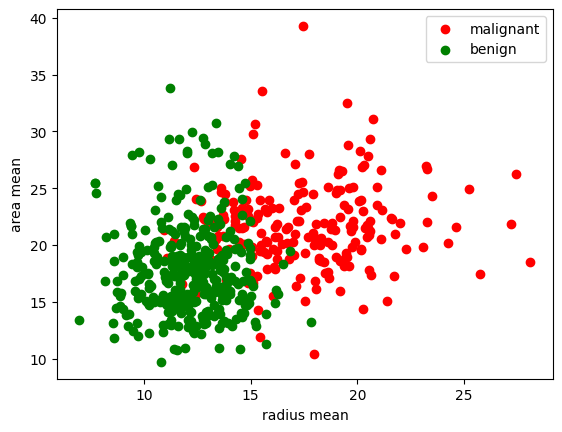

In [8]:
plt.scatter(M.radius_mean,M.texture_mean,color="red",label="malignant")
plt.scatter(B.radius_mean,B.texture_mean,color="green",label="benign")
plt.legend()
plt.xlabel("radius mean")
plt.ylabel("area mean")
plt.show()

In [9]:
data.diagnosis=[1 if each=="M" else 0 for each in data.diagnosis]

In [11]:
y=data.diagnosis.values
x_data=data.drop(["diagnosis"],axis=1)

In [12]:
x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [13]:
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.004229,0.002440,0.028867,0.235308,0.000028,0.000065,0.000071,0.000035,0.000057,0.000019,...,0.005966,0.004074,0.043394,0.474612,0.000038,0.000156,0.000167,0.000062,0.000108,0.000028
1,0.004835,0.004177,0.031241,0.311707,0.000020,0.000018,0.000020,0.000016,0.000043,0.000013,...,0.005874,0.005503,0.037330,0.459803,0.000029,0.000044,0.000057,0.000044,0.000065,0.000021
2,0.004629,0.004995,0.030559,0.282793,0.000026,0.000038,0.000046,0.000030,0.000049,0.000014,...,0.005541,0.006001,0.035849,0.401740,0.000034,0.000100,0.000106,0.000057,0.000085,0.000021
3,0.002685,0.004791,0.018237,0.090762,0.000033,0.000067,0.000057,0.000025,0.000061,0.000023,...,0.003505,0.006229,0.023242,0.133451,0.000049,0.000204,0.000161,0.000061,0.000156,0.000041
4,0.004770,0.003371,0.031758,0.304890,0.000024,0.000031,0.000047,0.000025,0.000043,0.000014,...,0.005299,0.003919,0.035778,0.370240,0.000032,0.000048,0.000094,0.000038,0.000056,0.000018


In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [15]:
from sklearn.svm import SVC
svc=SVC(random_state=42)
svc.fit(x_train,y_train)

SVC(random_state=42)

In [16]:
svc.score(x_test,y_test)

0.9181286549707602

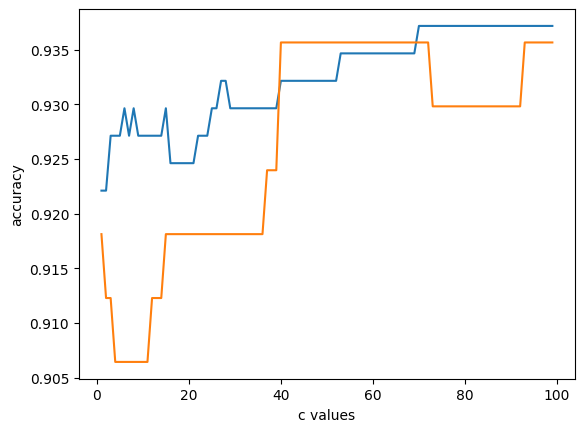

In [17]:
train_accuracy=[]
test_accuracy=[]
for i in range(1,100):
    svm=SVC(C=i)
    svm.fit(x_train,y_train)
    train_accuracy.append(svm.score(x_train,y_train))
    test_accuracy.append(svm.score(x_test,y_test))
plt.plot(range(1,100),train_accuracy,label="training accuracy")
plt.plot(range(1,100),test_accuracy,label="testing accuracy")
plt.xlabel("c values")
plt.ylabel("accuracy")
plt.show()

In [18]:
print("best accuracy is {} when c ={}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

best accuracy is 0.935672514619883 when c =40
